# Factor Analysis Sample

## Context

A team of physics education and educational psychology researchers adapted a series of motivational and attitudinal factors (previously used for surveys of undergraduate students in various programs) and administered these scales to physics graduate students at The Ohio State University.  Because the scales were adapted to the context of physics graduate students, we need to evaluate if each scale is measuring one factor (as desired, e.g. "belonging") or multiple factors (in which case the scales can be reduced in item number and/or altered further).

Example: We administer 11 survey items that we believe should measure a student's sense of belonging within the context of our department.  If factor analysis shows that these items load onto one factor, then we can comfortably say that these items all measure the same unobserved variable (and we imagine that variable is "belonging").  If the factor analysis reveals more than one factor, then we can eliminate items from the scale that do not load onto a primary factor (the one onto which most items load).  If there are multiple factors, it may also be the case that our scale "belonging" contains subscales. 

## Analyses

In [2]:
## libraries to import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# read in anonymized data
df = pd.read_csv('C:\PER\Grad retention\Data_Cleaned\DataSetFlatSheet_ABS_CleanedAndCoded.csv')

# to view sample of the data, un-comment following line
#df.head

<bound method NDFrame.head of        SID  Pop    Year  Uni  SSB.1_1  SSB.1_2  SSB.1_3  SSB.1_4  SSB.1_5  \
0    A2N22    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
1    A2N10    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
2    A2N13    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
3    A2N25    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
4     A2N3    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
5     A2N8    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
6     A2N7    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
7    A2N15    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
8    A2N21    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
9     A2N5    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
10   A2N26    A  2018.0  OSU      NaN      NaN      NaN      NaN      NaN   
11   A2N14    A  2018.0  OSU      NaN      NaN

In [3]:
def test_load(loadings): # test loadings (factor analysis) to see if loading value is greater than 0.33 (cutoff)
    return 1 * (abs(loadings)>=0.3)

#Cronbach's Alpha function
def CronbachAlpha(items):
    items = pd.DataFrame(items)
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))

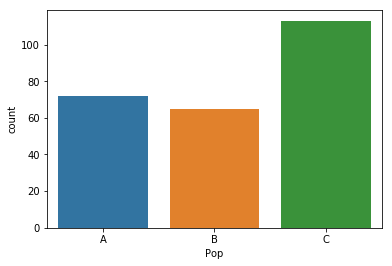

In [4]:
# view how many students make up each population in dataset (coded A, B, C)

sns.countplot(x='Pop', data = df)
plt.show()

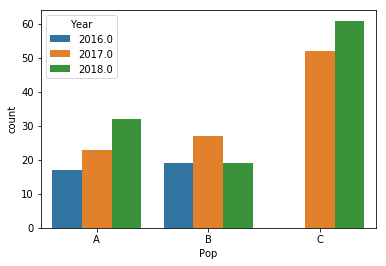

In [5]:
# see population representation by year of data collection

sns.countplot(x='Pop', hue = 'Year',data = df)
plt.show()

In [6]:
# isolate 2018 data (latest iteration of survey administration)

df2018 = df[df.Year == 2018]

In [7]:
# check column names

list(df.columns)

['SID',
 'Pop',
 'Year',
 'Uni',
 'SSB.1_1',
 'SSB.1_2',
 'SSB.1_3',
 'SSB.1_4',
 'SSB.1_5',
 'SSB.1_6R',
 'SSB.1_6',
 'SSB.1_7R',
 'SSB.1_7',
 'SSB.1_8R',
 'SSB.1_8',
 'SSB.1_9R',
 'SSB.1_9',
 'SSB.1_10R',
 'SSB.1_10',
 'Mean_SSB',
 'SD_SSB',
 'CCV.1_1',
 'CCV.1_2',
 'CCV.1_3',
 'CCV.1_4',
 'CCV.1_5',
 'CCV.1_6',
 'CCV.1_7',
 'Mean_CCV',
 'SD_CCV',
 'RV.2_1',
 'RV.2_2',
 'RV.2_3',
 'RV.2_4',
 'RV.2_5',
 'RV.2_6',
 'RV.2_7',
 'Mean_RV',
 'SD_RV',
 'DBel.1_1',
 'DBel.1_2R',
 'DBel.1_2',
 'DBel.1_3',
 'DBel.1_4R',
 'DBel.1_4',
 'DBel.1_5',
 'DBel.1_6',
 'DBel.1_7R',
 'Dbel.1_7',
 'DBel.1_8',
 'DBel.1_9',
 'DBel.1_10',
 'DBel.1_11',
 'Mean_DBel',
 'SD_DBel',
 'Q5.2',
 'InResearchGroup',
 'RBel.3_1',
 'RBel.3_2R',
 'RBel.3_2',
 'RBel.3_3',
 'RBel.3_4R',
 'RBel.3_4',
 'RBel.3_5',
 'RBel.3_6',
 'RBel.3_7R',
 'RBel.3_7',
 'RBel.3_8',
 'RBel.3_9',
 'RBel.3_10',
 'RBel.3_11',
 'Mean_RBel',
 'SD_RBel',
 'GO.Ma_1',
 'GO.Ma_2',
 'GO.Ma1_3',
 'Mean_GO.Ma',
 'SD_GO.Ma',
 'GO.PA_1',
 'GO.PA_2',
 'GO.

# Factor Analyses

## Social Supports and Barriers (SSB)

In [8]:
# create subset of data including only SSB measures

SSB = df[['SSB.1_1','SSB.1_2','SSB.1_3','SSB.1_4','SSB.1_5','SSB.1_6','SSB.1_7','SSB.1_8','SSB.1_9','SSB.1_10']]

#most students answered all items, so we will simply drop those who didn't answer some questions
SSB.dropna(inplace=True) 

SSB.head()

c:\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SSB.1_1,SSB.1_2,SSB.1_3,SSB.1_4,SSB.1_5,SSB.1_6,SSB.1_7,SSB.1_8,SSB.1_9,SSB.1_10
114,1.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0
115,2.0,3.0,3.0,3.0,3.0,1.0,-2.0,1.0,1.0,2.0
116,-2.0,2.0,1.0,1.0,3.0,3.0,3.0,-1.0,3.0,3.0
117,-1.0,0.0,1.0,2.0,0.0,1.0,-1.0,1.0,1.0,1.0
118,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0


 Check factorability of SSB using: <br>
 - <b>Bartlett's Test</b> (checks whether or not observed variables intercorrelate at all using observed correlation matrix vs identity matrix) <br>
 - <b>Kaiser-Meyer-Olkin Test </b>(measures the suitability of data for factor analysis. Estimates proportion of variance among all obersved variable. Lower porportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.)

In [9]:
# Bartlett's Test

chi_square_value, p_value = calculate_bartlett_sphericity(SSB)
chi_square_value, p_value

(333.1633174705562, 5.512788941521283e-46)

The Bartlett test found a p-value of less than 0.05. The statistical significance of this test means that *the observed correlation matrix is not an identity matrix.*

In [10]:
# KMO Test

kmo_all, kmo_model = calculate_kmo(SSB)
kmo_model

0.7880388882944855

The overall KMO for the SSB data is 0.79, which is very good. This value indicates I may safely proceed with the planned factor analysis.

<b>Choosing the number of factors: </b><br>
Use both the Kaiser criterion and scree plot (both are based on eigenvalues)

In [11]:
#Create factor anlysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=5)

#find factor loadings and view them
fa.fit(SSB)
print(fa.loadings_)

[[-0.11735541  0.86992285 -0.09431012 -0.07095859 -0.06274422]
 [ 0.07863989  0.55297363 -0.03354806  0.03579023  0.4227545 ]
 [-0.20085527  0.16770418  0.77450138  0.03275726  0.12943376]
 [ 0.1491627   0.36249826  0.30683002  0.04983793  0.06329863]
 [ 0.36192092  0.24199492  0.05179398 -0.04581031  0.54346805]
 [ 0.58078304 -0.23593914 -0.01327011 -0.03972469  0.3873972 ]
 [-0.00726801 -0.06919512 -0.00810943  1.01649205 -0.045462  ]
 [ 0.02614041 -0.1315226   0.6763422  -0.0256152  -0.05258681]
 [ 0.74721025 -0.01144539  0.19973962 -0.02700075 -0.09310379]
 [ 0.71455484  0.1027913  -0.17921613  0.04997568  0.08239937]]


These factor loadings are correlation coefficients between observed variables and latent common factors

In [12]:
test_load(fa.loadings_)

# this "test" assesses if each loading is above or below our cutoff value assigned earlier 

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [13]:
ev, v = fa.get_eigenvalues()
print(ev)

[3.73979997 1.65293511 1.23553598 0.8460139  0.59024316 0.52804072
 0.43069664 0.37066423 0.36346925 0.24260104]


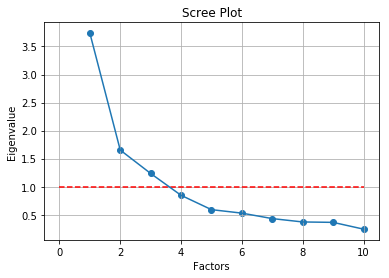

In [14]:
# scree plot

plt.scatter(range(1,SSB.shape[1]+1),ev)
plt.plot(range(1,SSB.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.hlines(1, xmin=0, xmax = 10,linestyles='dashed', color = 'red')
plt.savefig(r'C:\Users\abyru\Python\Projects\PER\GradRetention\Plots\Scree\SSB_scree.png')
plt.show()

These eigenvalues are measures of how much of the variance of the observed variables a factor explains. If a factor has an eigenvalue > 1, the factor explains more variance than a single observed variable.

In [15]:
# perform factor analysis using 3 factors (since factors 1-3 explain more variance than a single observed variable)

fa=FactorAnalyzer(rotation='varimax',n_factors=3)
fa.fit(SSB)
fa.loadings_

array([[-0.13419934,  0.69924712,  0.03295238],
       [ 0.31675493,  0.76280063,  0.14225748],
       [ 0.0557964 ,  0.45442893,  0.71768243],
       [ 0.24881116,  0.47558725,  0.44077315],
       [ 0.64103665,  0.5434605 ,  0.19701671],
       [ 0.74575331, -0.00107928,  0.08805161],
       [ 0.09238679,  0.01069526,  0.3639838 ],
       [ 0.1337427 ,  0.04793859,  0.57857471],
       [ 0.65750066,  0.02870647,  0.34850628],
       [ 0.66854658,  0.10433476,  0.09493701]])

In [16]:
# which factors do these items load onto? Each column represents a factor, each row represents a scale item (observed)
test_load(fa.loadings_)

array([[0, 1, 0],
       [1, 1, 0],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0]])

In [17]:
fa.get_factor_variance()

(array([2.05612346, 1.812973  , 1.37494332]),
 array([0.20561235, 0.1812973 , 0.13749433]),
 array([0.20561235, 0.38690965, 0.52440398]))

columns: factors (3 columns, one for each factor)
rows: SS Loadings, Proportion Var, Cumulative Var
52% Variance explained by these three factors (w/ eigenvalue greater than 1), 38% explained by the first two factors

In [18]:
# Cronbach alpha of the SSB items
# answers if our scale is reliable (internal consistency)

CronbachAlpha(SSB)

0.7663778976516235

In [19]:
 np.savetxt('SSB.txt', SSB, delimiter=',') 

## Department Belonging (DBel)

In [44]:
# We can perform the same series of steps for department belonging factor analysis

DBel = df[['DBel.1_1','DBel.1_2','DBel.1_3','DBel.1_4','DBel.1_5','DBel.1_6','Dbel.1_7','DBel.1_8','DBel.1_9','DBel.1_10','DBel.1_11']]
DBel.dropna(inplace=True)   #drop rows with missing values
DBel.head()    #view first fiew rows + all columns


c:\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DBel.1_1,DBel.1_2,DBel.1_3,DBel.1_4,DBel.1_5,DBel.1_6,Dbel.1_7,DBel.1_8,DBel.1_9,DBel.1_10,DBel.1_11
0,0.0,3.0,0.0,-1.0,-1.0,3.0,-1.0,1.0,2.0,-1.0,2.0
1,0.0,0.0,-1.0,-1.0,0.0,0.0,2.0,0.0,-1.0,-1.0,-1.0
2,0.0,1.0,0.0,-2.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0
3,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,-1.0,-1.0,1.0,1.0
4,2.0,-1.0,2.0,0.0,1.0,2.0,2.0,-1.0,2.0,1.0,3.0


In [45]:
#check factoribility
#Bartlett's test
chi_square_value, p_value = calculate_bartlett_sphericity(DBel)
chi_square_value, p_value

(643.6593439580083, 1.1558996671625944e-101)

In [46]:
#KMO Test
kmo_all, kmo_model = calculate_kmo(DBel)
kmo_model

0.810809245506706

In [47]:
#Finding number of factors
fa = FactorAnalyzer(n_factors = 2)
fa.fit(DBel)
print(fa.loadings_)

[[ 0.4641272   0.06244781]
 [ 0.48101182  0.21202509]
 [ 0.47607944 -0.02797116]
 [ 0.81755779 -0.19091373]
 [ 0.32484973  0.21101567]
 [ 0.69853384 -0.13396921]
 [ 0.42290552  0.11756656]
 [-0.02087216  0.66331514]
 [-0.03624511  0.76431946]
 [ 0.76905724  0.01334353]
 [-0.07157401  0.59250139]]


In [48]:
test_load(fa.loadings_)  
#function I wrote to return boolean version of factor loadings matrix

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

In [49]:
ev, v = fa.get_eigenvalues()
print(ev)

[3.87575169 1.42792786 1.07414742 0.84208473 0.72672486 0.69996805
 0.6018     0.52907272 0.50621003 0.40893848 0.30737416]


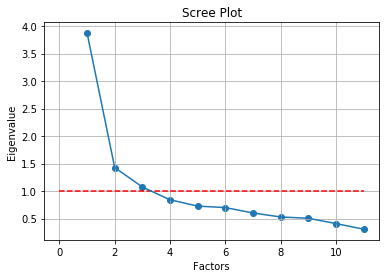

In [50]:
plt.scatter(range(1,DBel.shape[1]+1),ev)
plt.plot(range(1,DBel.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.hlines(1, xmin=0, xmax = 11,linestyles='dashed', color = 'red')
plt.savefig(r'C:\Users\abyru\Python\Projects\PER\GradRetention\Plots\Scree\DBel_scree.png')
plt.show()

In [51]:
#use appropriate number of factors given first pass above
fa = FactorAnalyzer(n_factors=3)
fa.fit(DBel)
fa.loadings_

array([[-5.00815312e-02,  7.09075433e-02,  7.05491695e-01],
       [ 4.84264669e-01,  2.08048946e-01,  1.61371164e-02],
       [-7.82089919e-04, -3.63448699e-02,  6.61645184e-01],
       [ 9.32877929e-01, -2.34402168e-01, -5.80734256e-02],
       [ 2.65712429e-01,  2.15294689e-01,  7.94804631e-02],
       [ 4.91478167e-01, -1.16332557e-01,  2.55012213e-01],
       [ 5.51108970e-01,  1.11321823e-01, -1.35616287e-01],
       [-9.05538672e-02,  6.62927456e-01,  9.78669356e-02],
       [ 2.08951926e-02,  7.55150425e-01, -5.46603400e-02],
       [ 7.15947506e-01,  1.72067434e-02,  7.99608054e-02],
       [-3.34175863e-02,  5.81588868e-01, -3.24772928e-02]])

In [52]:
test_load(fa.loadings_)

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [53]:
fa.get_factor_variance()
#columns: factors (3 columns, one for each factor) rows: SS Loadings, Proportion Var, #Cumulative Var

(array([2.24549143, 1.52512184, 1.04888016]),
 array([0.20413558, 0.13864744, 0.09535274]),
 array([0.20413558, 0.34278302, 0.43813577]))

In [54]:
CronbachAlpha(DBel)

0.8038043435489294

In [55]:
 np.savetxt('DBel.txt', DBel, delimiter=',')

## Research Group Belonging (RBel)

In [56]:
# We can perform the same series of steps for research group belonging factor analysis


RBel = df[['RBel.3_1','RBel.3_2','RBel.3_3','RBel.3_4','RBel.3_5','RBel.3_6','RBel.3_7','RBel.3_8','RBel.3_9','RBel.3_10','RBel.3_11']]
RBel.dropna(inplace=True)   #drop rows with missing values
RBel.head()    #view first fiew rows + all columns


c:\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,RBel.3_1,RBel.3_2,RBel.3_3,RBel.3_4,RBel.3_5,RBel.3_6,RBel.3_7,RBel.3_8,RBel.3_9,RBel.3_10,RBel.3_11
0,0.0,0.0,1.0,-2.0,-1.0,1.0,-1.0,0.0,-2.0,-1.0,-3.0
1,0.0,1.0,0.0,-1.0,0.0,1.0,-2.0,0.0,-2.0,-1.0,-3.0
2,1.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,-2.0
4,3.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,-1.0,1.0,-3.0
5,3.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0


In [57]:
#check factoribility
#Bartlett's test
chi_square_value, p_value = calculate_bartlett_sphericity(RBel)
chi_square_value, p_value

(1170.6326324140978, 3.28008439499389e-209)

In [58]:
#KMO Test
kmo_all, kmo_model = calculate_kmo(RBel)
kmo_model

0.890804307378262

In [59]:
#Finding number of factors
fa = FactorAnalyzer(n_factors = 2)
fa.fit(RBel)
print(fa.loadings_)

test_load(fa.loadings_)  
#function I wrote to return boolean version of factor loadings matrix


[[ 0.41280153  0.38579561]
 [ 0.53976585  0.15160758]
 [ 0.88933629 -0.19270007]
 [ 0.71936801  0.08286809]
 [ 0.46049895  0.3359255 ]
 [ 0.94486384 -0.20063176]
 [ 0.80799471 -0.05971025]
 [ 0.19214731  0.55993447]
 [-0.05180154  0.80569631]
 [ 0.71643644  0.17773514]
 [-0.16752758  0.60994543]]


array([[1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

In [60]:
#Finding number of factors
ev, v = fa.get_eigenvalues()
print(ev)

[5.61426716 1.32220677 0.74819292 0.68718089 0.56302213 0.49167906
 0.46088957 0.38543237 0.33502607 0.19895218 0.19315085]


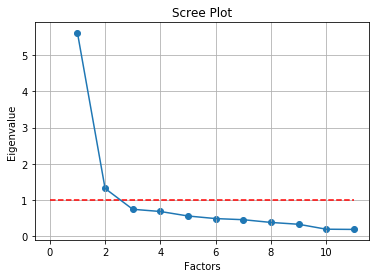

In [61]:
plt.scatter(range(1,RBel.shape[1]+1),ev)
plt.plot(range(1,RBel.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.hlines(1, xmin=0, xmax = 11,linestyles='dashed', color = 'red')
plt.savefig(r'C:\Users\abyru\Python\Projects\PER\GradRetention\Plots\Scree\RBel_scree.png')
plt.show()

In [62]:
#use appropriate number of factors given first pass above
fa = FactorAnalyzer(n_factors=2)
fa.fit(RBel)
fa.loadings_

array([[ 0.41280153,  0.38579561],
       [ 0.53976585,  0.15160758],
       [ 0.88933629, -0.19270007],
       [ 0.71936801,  0.08286809],
       [ 0.46049895,  0.3359255 ],
       [ 0.94486384, -0.20063176],
       [ 0.80799471, -0.05971025],
       [ 0.19214731,  0.55993447],
       [-0.05180154,  0.80569631],
       [ 0.71643644,  0.17773514],
       [-0.16752758,  0.60994543]])

In [63]:
test_load(fa.loadings_)

array([[1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

In [64]:
fa.get_factor_variance()
#columns: factors (3 columns, one for each factor) rows: SS Loadings, Proportion Var, #Cumulative Var

(array([4.10879471, 1.73878427]),
 array([0.37352679, 0.1580713 ]),
 array([0.37352679, 0.53159809]))

In [65]:
CronbachAlpha(RBel)

0.890420852556365

In [66]:
np.savetxt('RBel.txt', RBel, delimiter=',')